<a href="https://colab.research.google.com/github/Syedboo/Kaggle_house_price_prediction/blob/main/Spaceship_Titanic_competition_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**











*   **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

*   **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
*  **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.


*   **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
**Destination** - The planet the passenger will be debarking to.
Age - The age of the passenger.

*   **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
*   Destination - The planet the passenger will be debarking to.

*   **Age** - The age of the passenger.
*   **VIP** - Whether the passenger has paid for special VIP service during the voyage.


*   **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck **- Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
*   **Name** - The first and last names of the passenger.

*   **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.











1. PassengerID has feature group within it.
2.Cabin has features like deck/num/side, so separate them except num will be bin and tested and then kept if useful. also create deck+side combo.
3. Age should be binned
4. Name should be dropped
5.Amenities should be combined as 'Total' also if the total is greater than 0 cryo should be False or else true.

In [133]:
import pandas as pd

train_df = pd.read_csv("/content/sample_data/train.csv")
test_df = pd.read_csv("/content/sample_data/test.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [134]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [135]:
train_df.shape

(8693, 14)

In [200]:
test_df.shape

(4277, 14)

In [201]:
test_df.isna().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [137]:
train_df.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [138]:
train_df['GroupId'] = train_df['PassengerId'].str.split('_').str[0]
test_df['GroupId'] = test_df['PassengerId'].str.split('_').str[0]

In [139]:
def fill_homeplanet(train_df):
  train_df['HomePlanet'] = train_df.groupby('GroupId')['HomePlanet'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
  train_df['HomePlanet'] = train_df['HomePlanet'].fillna('Missing')


fill_homeplanet(train_df=train_df)


In [202]:
fill_homeplanet(train_df=test_df)

In [140]:
def totalspend(train_df):
  train_df['totalSpend'] = train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
  train_df['has_spent'] = (train_df['totalSpend'] > 0).astype(int)

totalspend(train_df=train_df)

In [203]:
totalspend(train_df=test_df)

In [141]:
def cryosleep_missingvalues(train_df):
  train_df.loc[train_df['CryoSleep'].isna() & (train_df['totalSpend']==0), 'CryoSleep'] = True
  train_df.loc[train_df['CryoSleep'].isna() & (train_df['totalSpend']!=0), 'CryoSleep'] = False

cryosleep_missingvalues(train_df= train_df)


In [204]:
cryosleep_missingvalues(train_df= test_df)

In [142]:
def fill_missing_values_with_groupID(df, filling_column,fill_rem_with_missing:bool, fill_rem_with_median:bool, fill_rem_with_mode:bool):
  df[filling_column] = df.groupby('GroupId')[filling_column].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
  if fill_rem_with_missing:
    df[filling_column] = df[filling_column].fillna('Missing')
  elif fill_rem_with_median:
    median_value = df[filling_column].median()
    df[filling_column] = df[filling_column].fillna(median_value)
  elif fill_rem_with_mode:
    mode = df[filling_column].mode()[0]
    df[filling_column] = df[filling_column].fillna(mode)






In [143]:
fill_missing_values_with_groupID(df=train_df, filling_column='Cabin', fill_rem_with_missing= True, fill_rem_with_median=False, fill_rem_with_mode=False)

In [144]:
fill_missing_values_with_groupID(df=train_df, filling_column='Destination', fill_rem_with_missing= False, fill_rem_with_median=False, fill_rem_with_mode=True)

In [205]:
fill_missing_values_with_groupID(df=test_df, filling_column='Cabin', fill_rem_with_missing= True, fill_rem_with_median=False, fill_rem_with_mode=False)
fill_missing_values_with_groupID(df=test_df, filling_column='Destination', fill_rem_with_missing= False, fill_rem_with_median=False, fill_rem_with_mode=True)

In [146]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Encode categorical
df_encoded = train_df[['Age', 'HomePlanet', 'VIP', 'CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].copy()

for col in ['HomePlanet', 'VIP', 'CryoSleep']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Apply KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# Replace age
train_df['Age'] = df_imputed[:, 0]


In [206]:
# Encode categorical
df_encoded = test_df[['Age', 'HomePlanet', 'VIP', 'CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].copy()

for col in ['HomePlanet', 'VIP', 'CryoSleep']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Apply KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_encoded)

# Replace age
test_df['Age'] = df_imputed[:, 0]

In [147]:
train_df['IsChild'] = (train_df['Age'] < 12).astype(int)


In [207]:
test_df['IsChild'] = (test_df['Age'] < 12).astype(int)


In [217]:
train_df.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [216]:
test_df.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [150]:
fill_missing_values_with_groupID(df=train_df, filling_column='VIP', fill_rem_with_missing= False, fill_rem_with_median=False, fill_rem_with_mode=False)

In [208]:
fill_missing_values_with_groupID(df=test_df, filling_column='VIP', fill_rem_with_missing= False, fill_rem_with_median=False, fill_rem_with_mode=False)

We're going to fill remaining VIP values by total spend

In [209]:
def fill_VIP(train_df):
  median_spend = train_df['totalSpend'].median()
  train_df.loc[train_df['VIP'].isna() & (train_df['VIP'] > median_spend),'VIP'] = True
  train_df.loc[train_df['VIP'].isna() & (train_df['CryoSleep']==True),'VIP'] = True
  fill_missing_values_with_groupID(df=train_df, filling_column='VIP',fill_rem_with_median=False, fill_rem_with_missing=False, fill_rem_with_mode=False)
  train_df['VIP'] = train_df['VIP'].fillna('False')

fill_VIP(train_df)
fill_VIP(test_df)

In [152]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,totalSpend,has_spent,Transported_numeric,IsChild,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,0.0,0,0,0,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,736.0,1,1,0,YoungAdult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,10383.0,1,0,0,Senior
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,5176.0,1,0,0,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1091.0,1,1,0,Teen


In [156]:
train_df['Age'].min()

0.0

In [210]:
def handle_null_for_spending_cols(train_df):
  spending_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
  for col in spending_cols:
    train_df[col] = train_df[col].fillna(0)


handle_null_for_spending_cols(test_df)
handle_null_for_spending_cols(train_df)


In [219]:
x_test = test_df.drop(columns=['PassengerId','Name'])

In [163]:
x_train = train_df.drop(columns=['PassengerId','Name','Transported'])
y_train = train_df['Transported']

In [166]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 16.7 MB/s eta 0:00:00


In [172]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop target and unnecessary columns
x_train = train_df.drop(columns=['PassengerId', 'Name', 'Transported'])
y_train = train_df['Transported'].astype(int)  # convert boolean to int

# 1. Encode object columns
for col in x_train.select_dtypes(include='object').columns:
    x_train[col] = LabelEncoder().fit_transform(x_train[col].astype(str))

# 2. Convert boolean-like object columns if any
# (In your case, CryoSleep and VIP may be 'True'/'False' as strings)
x_train['CryoSleep'] = x_train['CryoSleep'].map({'True': 1, 'False': 0})
x_train['VIP'] = x_train['VIP'].map({'True': 1, 'False': 0})


# 4. Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(
    x_train, y_train, stratify=y_train, random_state=42
)

# 5. Run LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

# 6. View results
print(models.sort_values(by='Accuracy', ascending=False))


  0%|          | 0/32 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7792088316467342, 'Balanced Accuracy': np.float64(0.7789801989834999), 'ROC AUC': np.float64(0.7789801989834998), 'F1 Score': 0.7789693230702442, 'Time taken': 0.6747784614562988}
{'Model': 'BaggingClassifier', 'Accuracy': 0.7778288868445262, 'Balanced Accuracy': np.float64(0.7781723310523443), 'ROC AUC': np.float64(0.7781723310523443), 'F1 Score': 0.7773888629267757, 'Time taken': 0.7957534790039062}
{'Model': 'BernoulliNB', 'Accuracy': 0.7364305427782889, 'Balanced Accuracy': np.float64(0.7369748752650223), 'ROC AUC': np.float64(0.7369748752650223), 'F1 Score': 0.7350530445228836, 'Time taken': 0.032178640365600586}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7792088316467342, 'Balanced Accuracy': np.float64(0.7791630166609536), 'ROC AUC': np.float64(0.7791630166609537), 'F1 Score': 0.779196683834018, 'Time taken': 0.17505192756652832}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7396504139834407, 'Balanced Accuracy': np.float6

In [213]:
print(x_train.dtypes)


HomePlanet        int64
CryoSleep       float64
Cabin             int64
Destination       int64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
GroupId           int64
totalSpend      float64
has_spent         int64
IsChild           int64
AgeGroup           int8
dtype: object


In [223]:
print(x_test.dtypes)


HomePlanet        int64
CryoSleep       float64
Cabin             int64
Destination       int64
VIP             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
GroupId           int64
totalSpend      float64
has_spent         int64
IsChild           int64
AgeGroup          int64
dtype: object


In [222]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original
df = x_test

# 1. Encode binary object columns (True/False strings)
binary_cols = ['CryoSleep', 'VIP']
for col in binary_cols:
    df[col] = df[col].map({'True': 1, 'False': 0})
    df[col] = df[col].fillna(-1)  # Optionally mark unknowns with -1

# 2. Label encode other categorical (object) columns
# Skip already handled binary columns
categorical_cols = ['HomePlanet', 'Cabin', 'Destination', 'GroupId','AgeGroup']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Convert NaN to 'nan' for encoding
    df[col] = le.fit_transform(df[col])

# 3. Convert AgeGroup (category) to codes
if 'AgeGroup' in df.columns and df['AgeGroup'].dtype.name == 'category':
    df['AgeGroup'] = df['AgeGroup'].cat.codes

# 4. Fill missing values in numerical columns
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'totalSpend']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())  # Or use .fillna(0) if appropriate

  # Now df is ready to use with XGBoost or other ML models



KeyError: 'Age'

In [191]:
x_train['AgeGroup'] = x_train['AgeGroup'].astype('category').cat.codes
x_train = x_train.drop(columns='Age')




In [221]:
x_test['AgeGroup'] = pd.cut(x_test['Age'], bins=[-1, 12, 18, 25, 40, 60, 100],
                        labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'MidAge', 'Senior'])

x_test['AgeGroup'] = x_test['AgeGroup'].astype('category').cat.codes
x_test = x_test.drop(columns='Age')




In [193]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Define model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
}

# Setup RandomizedSearchCV
search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Run search
search.fit(x_train, y_train)

# Results
print("Best Accuracy: ", search.best_score_)
print("Best Params: ", search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Accuracy:  0.7706262808605928
Best Params:  {'colsample_bytree': np.float64(0.6360661246923176), 'gamma': np.float64(0.32384506027068116), 'learning_rate': np.float64(0.010156113098594747), 'max_depth': 7, 'n_estimators': 332, 'subsample': np.float64(0.6523906290790145)}


In [195]:
import joblib
joblib.dump(search, 'xgb_random_search.pkl')


['xgb_random_search.pkl']

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 500),         # Number of trees
    'max_depth': randint(5, 20),               # Max depth of each tree
    'min_samples_split': randint(2, 10),       # Min samples to split a node
    'min_samples_leaf': randint(1, 10),        # Min samples per leaf
    'max_features': ['sqrt', 'log2', None],    # Number of features to consider at each split
    'bootstrap': [True, False],                # Use bootstrap samples
}

# Setup RandomizedSearchCV
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Run search
search.fit(x_train, y_train)

# Results
print("Best Accuracy: ", search.best_score_)
print("Best Params: ", search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Accuracy:  0.7755727767039375
Best Params:  {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 120}


In [198]:
import joblib
joblib.dump(search, 'rfc_random_search.pkl')


['rfc_random_search.pkl']

In [224]:
best_rf_model = search.best_estimator_
y_pred = best_rf_model.predict(x_test)

In [229]:

y_pred_bool = pd.Series(y_pred).map({1:'True', 0:'False'})

submission_df = pd.DataFrame({'PassengerId':test_df['PassengerId'],
                              'Transported': y_pred_bool})

submission_df.to_csv('spaceship_submission.csv', index=False)

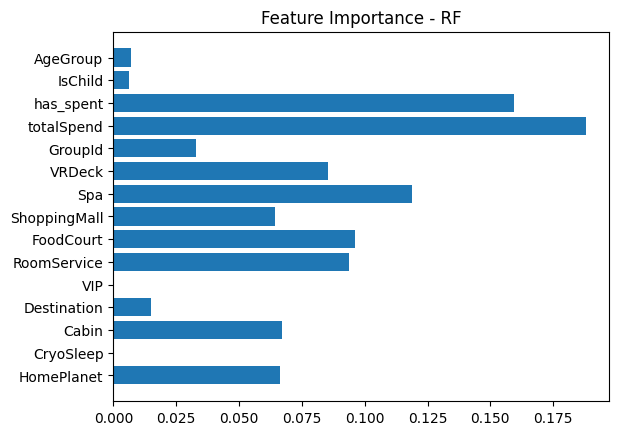

In [230]:
import matplotlib.pyplot as plt

importances = best_rf_model.feature_importances_
feat_names = x_train.columns
plt.barh(feat_names, importances)
plt.title("Feature Importance - RF")
plt.show()
